In [7]:
import pandas as pd
import numpy as np
from package import function
from package import DT
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv("df_final.csv")
X = df.drop(["cardio"],axis = 1)
y = df.cardio

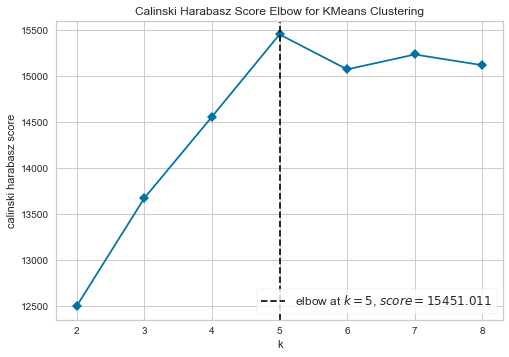

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [9]:
model = KMeans(random_state = 20220607)
visualizer = KElbowVisualizer(model,metric='calinski_harabasz', k = (2, 9),timings = False)
visualizer.fit(X)
visualizer.show()

In [10]:
clusterer = KMeans(n_clusters = 5, random_state = 20220607)
cluster_labels = clusterer.fit_predict(X)
X["cluster"] = cluster_labels
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.3,random_state = 20220607)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Set the model with params: {'criterion': 'gini', 'max_depth': 6}
The score is 0.733429 for DTF


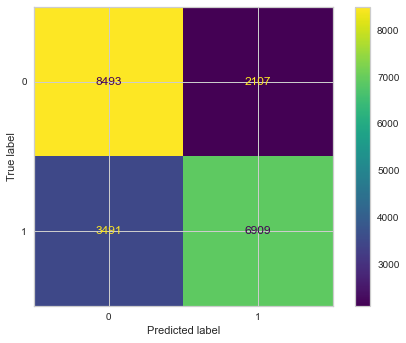

In [12]:
model = DT.DecisionTree()
model.baseline()
model.best_model(Xtrain,ytrain)
model.fit(Xtrain,ytrain)
ypr,probTest = model.predict(Xtest)
function.eval_confusion("DTF",ypr,ytest)